# Data fitting using "Gradient Descent" method and "Orthogonal Regression" method

Import neccesary packages

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Part 1: Gradient Descent method

### 1.1

In [ ]:
def generate_U(u, d):
    m = len(u)
    U = np.zeros((m, d + 1))

    for i in range(d + 1):
        U[:, i] = np.power(u, i)

    return U


def data_fitting(U, y):
    return np.linalg.solve( U.T @ U, U.T @ y)

def compute_error(y, yhat):
    n = len(y)
    error = 0

    for i in range(n):
        error += (y[i] - yhat[i])**2

    return error

def load_data(path):
    file = open(path).read().split('\n')
    lines = [line.split() for line in file]
    return [(eval(x[0]),eval(x[1])) for x in lines ]

def generate_D(n): # generate matrix D with shape:(n-1)*n for normalization
    D = np.zeros((n - 1, n))
    
    for i in range(n - 1):
        D[i, i] = 1
        D[i, i + 1] = -1
        
    return D


# find answer of rls with given matrices A and D and regularization factor lambda; denoise row by row
def denoise_rows(A, D, img, lamda): 
    n, m = img.shape
    denoised = np.zeros((n, m))

    for i in range(n):
        denoised[i, :] = ( np.linalg.solve( A + lamda*(D.T @ D), (img[i, :].T)) ).T

    return denoised

# find answer of rls with given matrices A and D and regularization factor lambda; denoise column by column
def denoise_cols(A, D, img, lamda): 
    n, m = img.shape
    denoised = np.zeros((n, m))

    for i in range(m):
        denoised[:, i] = np.linalg.solve( A + lamda*(D.T @ D), (img[:, i]))

    return denoised

D = generate_D(256) # the shape of D matrix is 256*255 based on our image size
A = np.eye(256) # the shape of A matrix is 256*255 based on our image size (equals I in denoising problem)
    

### 1.2

#### Procedure for Data1

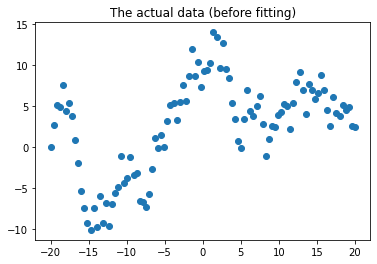

In [ ]:
d1 = load_data('./data/Data5.txt')
d1 = np.array(d1)
plt.scatter(x = d1[:, 0], y = d1[:, 1])
plt.title("The actual data (before fitting)")
plt.show()

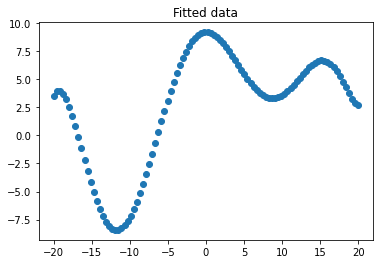

In [ ]:
U = generate_U(d1[:, 0], 8)
a = data_fitting(U, d1[:, 1])
yhat = U @ a
plt.scatter(d1[:, 0], yhat)
plt.title("Fitted data")
plt.show()

#### Procedure for Data2

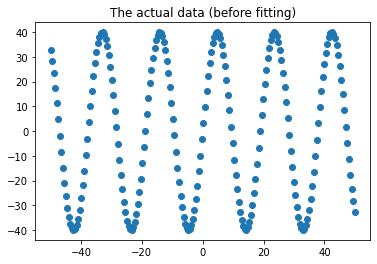

In [ ]:
d2 = load_data('./data/Data6.txt')
d2 = np.array(d2)
plt.scatter(x = d2[:, 0], y = d2[:, 1])
plt.title("The actual data (before fitting)")
plt.show()

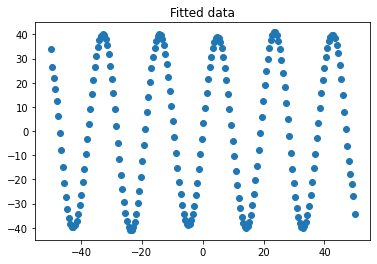

In [ ]:
U = generate_U(d2[:, 0], 19)
a = data_fitting(U, d2[:, 1])
yhat = U @ a
plt.scatter(d2[:, 0], yhat)
plt.title("Fitted data")
plt.show()

#### Procedure for Data3

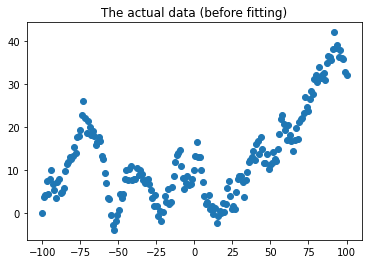

In [ ]:
d3 = load_data('./data/Data3.txt')
d3 = np.array(d3)
plt.scatter(x = d3[:, 0], y = d3[:, 1])
plt.title("The actual data (before fitting)")
plt.show()

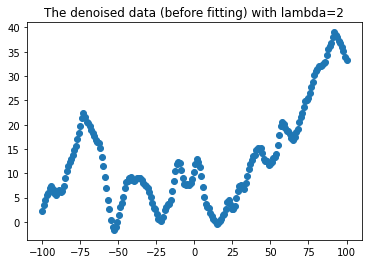

In [ ]:
d3 = d3[d3[:, 0].argsort()] # sort by first column

n = d3.shape[0]
D = generate_D(n)
A = np.eye(n)

col1 = d3[:, 1].reshape((-1, 1))

denoised_d3 = np.copy(d3)

lamda = 2
denoised_d3[:, 1] = denoise_cols(A, D, col1, lamda).reshape((-1, )) # denoise by second column

plt.scatter(x = denoised_d3[:, 0], y = denoised_d3[:, 1])
plt.title(f"The denoised data (before fitting) with lambda={lamda}")
plt.show()

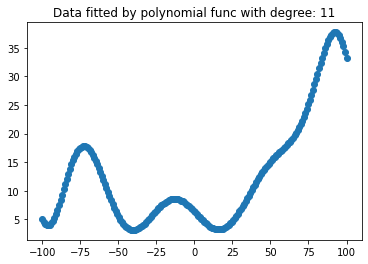

In [ ]:
degree = 11
U = generate_U(denoised_d3[:, 0], degree)
a = data_fitting(U, denoised_d3[:, 1])

yhat = U @ a

plt.scatter(denoised_d3[:, 0], yhat)
plt.title(f"Data fitted by polynomial func with degree: {degree}")
plt.show()

#### Procedure for Data4

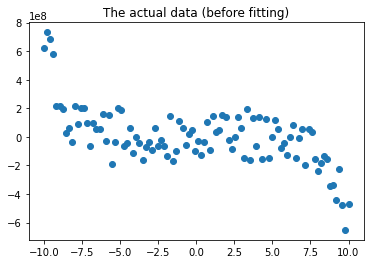

In [ ]:
d4 = load_data('./data/Data4.txt')
d4 = np.array(d4)
plt.scatter(x = d4[:, 0], y = d4[:, 1])
plt.title("The actual data (before fitting)")
plt.show()

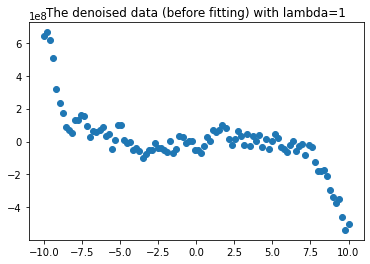

In [ ]:
d4 = d4[d4[:, 0].argsort()] # sort by first column

n = d4.shape[0]
D = generate_D(n)
A = np.eye(n)

col1 = d4[:, 1]
col1 = col1.reshape((-1, 1))

denoised_d4 = np.copy(d4)

lamda = 1
denoised_d4[:, 1] = denoise_cols(A, D, col1, lamda).reshape((-1, )) # denoise by second column

plt.scatter(x = denoised_d4[:, 0], y = denoised_d4[:, 1])
plt.title(f"The denoised data (before fitting) with lambda={lamda}")
plt.show()

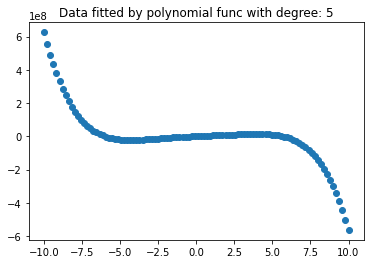

In [ ]:
degree = 5
U = generate_U(denoised_d4[:, 0], degree)
a = data_fitting(U, denoised_d4[:, 1])

yhat = U @ a

plt.scatter(denoised_d4[:, 0], yhat)
plt.title(f"Data fitted by polynomial func with degree: {degree}")
plt.show()

### 1.3

#### Procedure for Data3

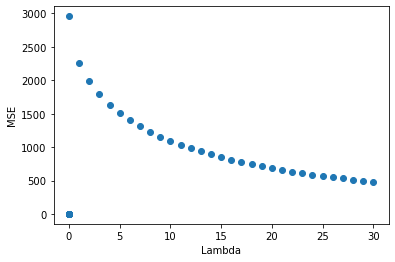

In [ ]:
error_lamda = np.zeros((d3.shape[0], 2))
index = 0

n = d3.shape[0]
D = generate_D(n)
A = np.eye(n)

for lamda in range(31):
    col1 = d3[:, 1]
    col1 = col1.reshape((-1, 1))

    denoised_d3 = np.copy(d3)
    
    denoised_d3[:, 1] = denoise_cols(A, D, col1, lamda).reshape((-1, )) # denoise by second column

    degree = 10
    U = generate_U(denoised_d3[:, 0], degree)
    a = data_fitting(U, denoised_d3[:, 1])

    yhat = U @ a

    cur_error = compute_error(denoised_d3[:, 1], yhat)
    error_lamda[index] = [lamda, cur_error]
    index += 1

plt.scatter(x = error_lamda[:, 0], y = error_lamda[:, 1])
plt.xlabel("Lambda")
plt.ylabel("MSE")
plt.show()

#### Procedure for Data4

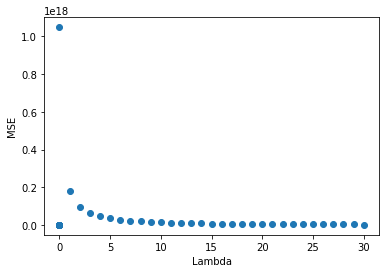

In [ ]:
error_lamda = np.zeros((d4.shape[0], 2))
index = 0

n = d4.shape[0]
D = generate_D(n)
A = np.eye(n)

for lamda in range(31):
    col1 = d4[:, 1]
    col1 = col1.reshape((-1, 1))

    denoised_d4 = np.copy(d4)
    
    denoised_d4[:, 1] = denoise_cols(A, D, col1, lamda).reshape((-1, )) # denoise by second column

    degree = 10
    U = generate_U(denoised_d4[:, 0], degree)
    a = data_fitting(U, denoised_d4[:, 1])

    yhat = U @ a

    cur_error = compute_error(denoised_d4[:, 1], yhat)
    error_lamda[index] = [lamda, cur_error]
    index += 1

plt.scatter(x = error_lamda[:, 0], y = error_lamda[:, 1])
plt.xlabel("Lambda")
plt.ylabel("MSE")
plt.show()

____

### 1.4

If the data set is well-defined, meaning that is has the property of function and for each x we have exactly on y, then we are able to define a polynomial function with a large enough degree which fits our data set well. For example for a case where our data sets is shaped like a circle (not a function), we can never find any function that would fit it properly. But in other cases, we can set the maximum degree large enough and get a model with a good fit.

### 1.5

With increasing the regularization parameter, lambda, we are giving more concern to our regularization term. Our regularization term is defined in a way that it decreases the distance between consecutive data points. Also, our error function is defined in a way that it computes the mean distance between fitted points and actual points. So it is reasonable to get a smaller value from the error function with larger lambda as we are actually paying more attention to the points being closer to each other. <br /> <br />
On the other hand, having a too large regularization parameter results in losing the variability of our data set and having a model which over-simplifies our initial data.

# Part 2: Orthogonal Regression method

In [ ]:
def MSE(y, y_hat):

   error = 0
   m = len(y)
   for i in range(m):
      error += (y[i] - y_hat[i]) ** 2
   error = error / m

   return error

def MSA(y, y_hat):

   error = 0
   m = len(y)
   for i in range(m):
      error += abs(y[i] - y_hat[i])
   error = error / m

   return error

## Q1: Orthogonal regression implementation

In [ ]:
def solve_oreg(A):

   m = A.shape[0]
   I = np.eye(m)
   e = np.array([1 for _ in range(m)]).reshape((-1, 1))
   Q = A.T @ (I - ((e @ e.T) / m)) @ A

   eig_vals, eig_vectors = np.linalg.eig(Q)

   min_eig_val = eig_vals[0]
   min_eig_index = 0
   for i in range(len(eig_vals)): # find the minimum eigenvalue and its' corresponding index

      if (eig_vals[i] < min_eig_val):
         min_eig_val = eig_vals[i]
         min_eig_index = i
   
   p = eig_vectors[:, min_eig_index]

   alpha = 0
   for i in range(m):
      alpha += np.dot(A[i, :], p)
   alpha = alpha / m

   return p, alpha

## Q2: Use orthogonal regression on the given datasets

Implement orthogonal regression on the first dataset

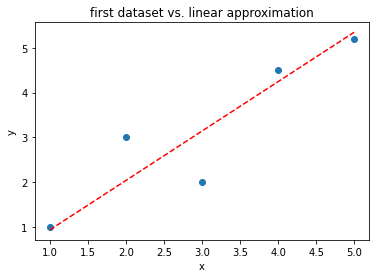

In [ ]:
data_path1 = "./data/data1.txt"

data1 = np.array(load_data(data_path1))
p1, alpha1 = solve_oreg(data1)

y_line1 = (alpha1 - p1[0] * data1[:, 0]) / p1[1]

plt.scatter(data1[:, 0], data1[:, 1])
plt.plot(data1[:, 0], y_line1, '--', c='red')
plt.title("first dataset vs. linear approximation")
plt.xlabel('x')
plt.ylabel('y')
plt.show()


Implement orthogonal regression on the second dataset

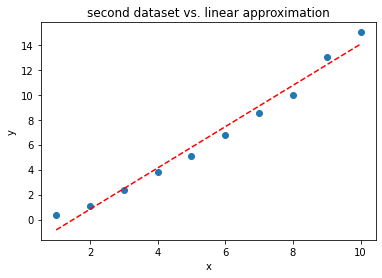

In [ ]:
data_path2 = "./data/data2.txt"

data2 = np.array(load_data(data_path2))
p2, alpha2 = solve_oreg(data2)

y_line2 = (alpha2 - p2[0] * data2[:, 0]) / p2[1]

plt.scatter(data2[:, 0], data2[:, 1])
plt.plot(data2[:, 0], y_line2, '--', c='red')
plt.title("second dataset vs. linear approximation")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Q3: Predict house price with orthogonal regression

### Q3.1

In [3]:
df = pd.read_csv("./data/boston.csv")
print(df.info())
A = df[['RM', 'MEDV']]
print(A.head())
A = A.to_numpy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB
None
      RM  MEDV
0  6.575  24.0
1  6.421  21.6
2  7.185  34.7
3  6.998  33.4
4  7.147  36.2


### Q3.2

In [4]:
train, test = train_test_split(A, test_size=0.2, random_state=1)

### Q3.3

In [ ]:
p_house, alpha_house = solve_oreg(train)
print(p_house, alpha_house)

[-0.9986737   0.05148624] -5.10089052602218


### Q3.4

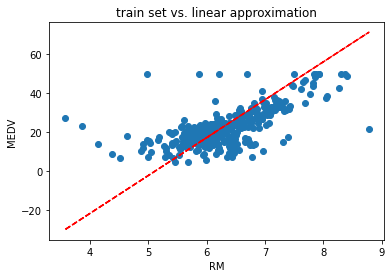

In [ ]:
y_line_house_train = (alpha_house - p_house[0] * train[:, 0]) / p_house[1]

plt.scatter(train[:, 0], train[:, 1])
plt.plot(train[:, 0], y_line_house_train, '--', c='red')
plt.xlabel("RM")
plt.ylabel("MEDV")
plt.title("train set vs. linear approximation")
plt.show()

### Q3.5

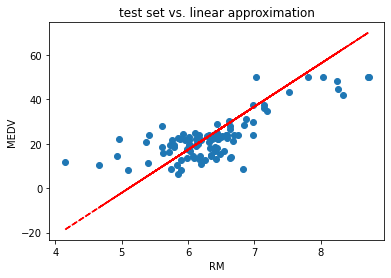

In [ ]:
y_line_house_test = (alpha_house - p_house[0] * test[:, 0]) / p_house[1]

plt.scatter(test[:, 0], test[:, 1])
plt.plot(test[:, 0], y_line_house_test, '--', c='red')
plt.xlabel("RM")
plt.ylabel("MEDV")
plt.title("test set vs. linear approximation")
plt.show()

### Q3.6

In [ ]:
mse_err = MSE(y_line_house_test, test[:, 1])
print(f"MSE of the train set: {mse_err}")

msa_err = MSA(y_line_house_test, test[:, 1])
print(f"MSA of the train set: {msa_err}")

MSE of the train set: 87.51837382604774
MSA of the train set: 6.978793226223718


### Bonus: Dimension reduction using LDA

In [ ]:
train, test = train_test_split(df, test_size=0.2, random_state=1)

A_train = train[[col for col in train.columns if col != 'MEDV']].to_numpy() # remove MEDV column
medv_train = (train['MEDV']).to_numpy()

lda = LDA(n_components = 1)
medv_binned = pd.qcut(medv_train, q=3, labels=False)
A_lda_train = lda.fit_transform(A_train, medv_binned)

A_test = test[[col for col in test.columns if col != 'MEDV']].to_numpy() # remove MEDV column
medv_test = (test['MEDV']).to_numpy()

A_lda_test = lda.transform(A_test)


Implement orthogonal regression on the dataset with reduced dimension

In [ ]:
train_lda = np.concatenate((A_lda_train, medv_train.reshape((-1, 1))), axis=1)

p_lda, alpha_lda = solve_oreg(train_lda)
print(p_lda, alpha_lda)

[-0.98666313 -0.16277551] -3.6660751769998816


Approximate line for the train set

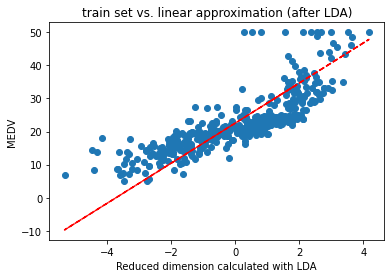

In [ ]:
y_line_house_train = (alpha_lda - p_lda[0] * train_lda[:, 0]) / p_lda[1]

plt.scatter(-train_lda[:, 0], train_lda[:, 1])
plt.plot(-train_lda[:, 0], y_line_house_train, '--', c='red')
plt.xlabel("Reduced dimension calculated with LDA")
plt.ylabel("MEDV")
plt.title("train set vs. linear approximation (after LDA)")
plt.show()

Approximate test set with trained line

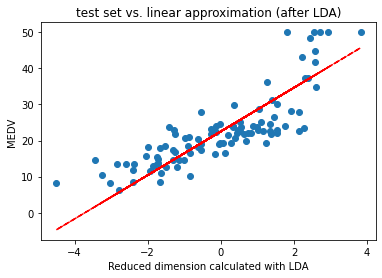

In [ ]:
test_lda = np.concatenate((A_lda_test, medv_test.reshape((-1, 1))), axis = 1)
y_line_house_test = (alpha_lda - p_lda[0] * test_lda[:, 0]) / p_lda[1]

plt.scatter(-test_lda[:, 0], test_lda[:, 1])
plt.plot(-test_lda[:, 0], y_line_house_test, '--', c='red')
plt.xlabel("Reduced dimension calculated with LDA")
plt.ylabel("MEDV")
plt.title("test set vs. linear approximation (after LDA)")
plt.show()

Measure MSE and MSA in the new method

In [ ]:
mse_err = MSE(y_line_house_test, test_lda[:, 1])
print(f"MSE of the train set: {mse_err}")

msa_err = MSA(y_line_house_test, test_lda[:, 1])
print(f"MSA of the train set: {msa_err}")

MSE of the train set: 35.94553178181545
MSA of the train set: 4.78858120071956
